In [ ]:
# Overlay the raw plot on top of the decoded plot

In [12]:
import pandas as pd
import glob as glob

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statistics import mean
from statistics import stdev

In [3]:
ls

Casey_Greene_baseline.ipynb
Classical ML on raw vs decoded notes.rtf
RF_BRCA_r0/
baseline_00.ipynb
baseline_01.ipynb
baseline_02.ipynb
baseline_03.ipynb
baseline_04.ipynb
data/
decoded/
decoded_baseline_F1s/
decoded_baseline_plots/
matrices_build.ipynb
overlay.ipynb
raw_baseline_F1s/
raw_baseline_plots/


In [4]:
ls decoded_baseline_F1s/

5k_r0.tsv


In [17]:
dec = pd.read_csv('decoded_baseline_F1s/5k_r0.tsv', sep = '\t', index_col = 0)

In [6]:
ls raw_baseline_F1s/

5k_r0.tsv         blnk_frm_r0.tsv   blnk_frm_tst.tsv


In [9]:
raw = pd.read_csv('raw_baseline_F1s/5k_r0.tsv', sep = '\t', index_col = 0)

In [ ]:
# blank frame read is now raw

In [14]:
idx_pos

24

raw done


Text(0.5, 1.0, 'Raw vs decoded samples, random forest classifier, cohorts n = 25, 5k MAD feats from 17k intersection genes\n5 resamplings per cohort at 100% sampling rate, 5 train-test splits per resampling')

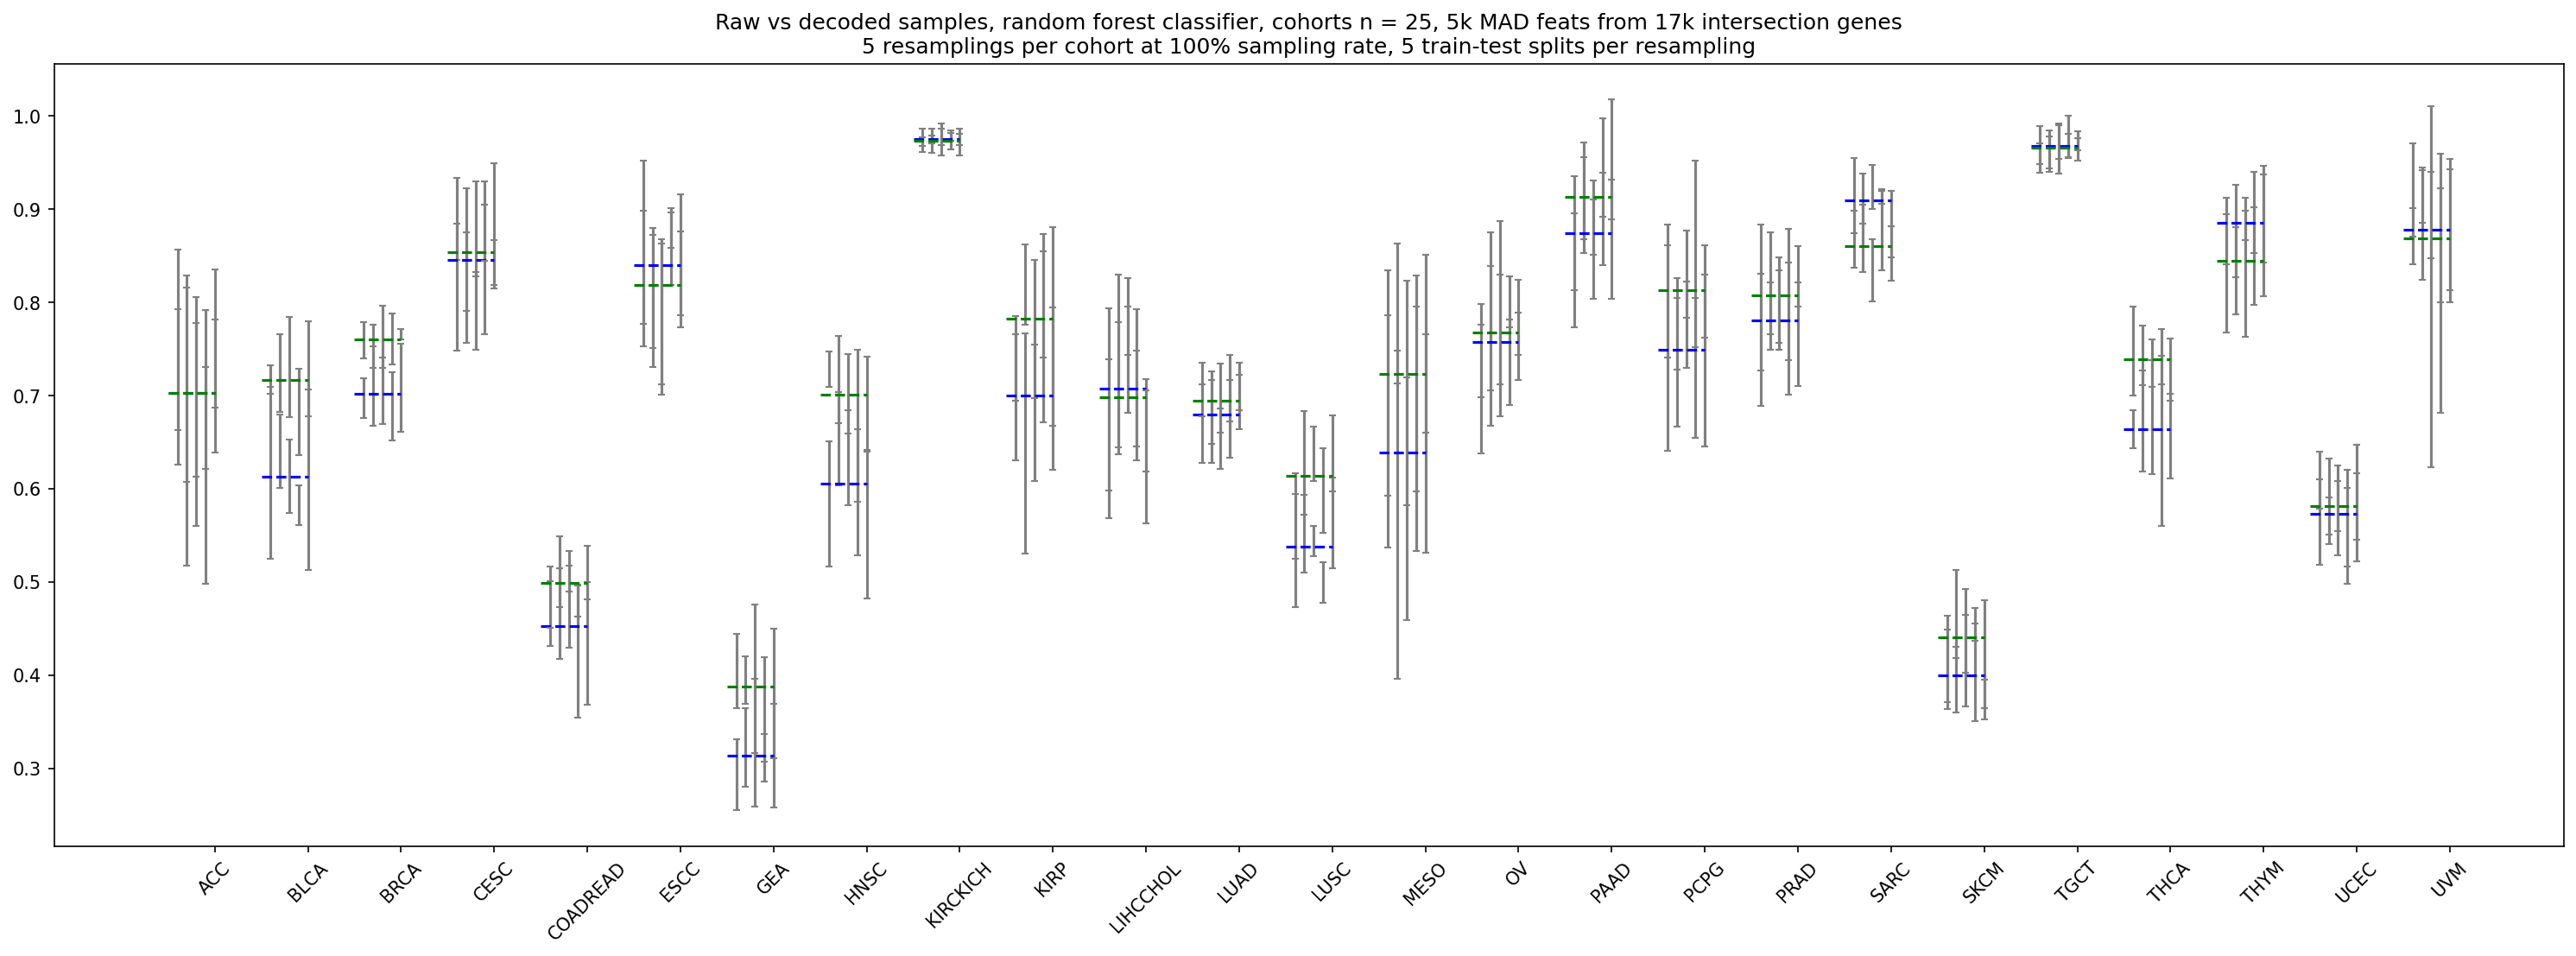

In [19]:
# Raw and decoded overlay plot
plt_v=12 # ten was original raw, 11 was original decoded

re_samp = 5
trn_tst_splts = 5

figure(figsize=(len(raw.index), 8), dpi=150)
# plt.scatter(.01, .99, color = 'white')

x_tck_lst = [] # only need once, done in raw section
cohort_list = [] # only need once, done in raw section

# Raw start
for idx_pos, idx in enumerate(raw.index):

    x = idx_pos
    ave_mean = [] # for raw, need for deco
    for rs in list(range(0,re_samp)): # use to step through the columns

        adder = .1
        x = x+adder
        plt.errorbar(
            x,
            raw.loc[idx, 'mean'+str(rs)],
            yerr=raw.loc[idx, 'std'+str(rs)], capsize = 2,
            color = 'grey')
        ave_mean.append(raw.loc[idx, 'mean'+str(rs)])
        
    x_points = [x-.5, x]
    y_points = [mean(ave_mean), mean(ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'blue') # blue is raw
# Raw end   
    
    x_tck_lst.append(idx_pos+.5) # only need once, send to end
    cohort_list.append(idx.split('_')[0]) # only need once, send to end
    
print('raw done') 
for idx_pos, idx in enumerate(dec.index):

    x = idx_pos
    ave_mean = []
    for rs in list(range(0,re_samp)): # use to step through the columns

        adder = .1
        x = x+adder
        plt.errorbar(
            x,
            dec.loc[idx, 'mean'+str(rs)],
            yerr=dec.loc[idx, 'std'+str(rs)], capsize = 2,
            color = 'grey')
        ave_mean.append(dec.loc[idx, 'mean'+str(rs)])
        
    x_points = [x-.5, x]
    y_points = [mean(ave_mean), mean(ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'green')
    
plt.xticks(x_tck_lst, labels = cohort_list, rotation = 45)
# plt.scatter(25, .25, color = 'white')  
plt.title('Raw vs decoded samples, random forest classifier, cohorts n = 25, 5k MAD feats from 17k intersection genes\n'+
         '5 resamplings per cohort at 100% sampling rate, 5 train-test splits per resampling')
# plt.annotate(str(re_samp * trn_tst_splts)+' trn tst splts', (x-.2,1.-3))
# plt.savefig('overlay_plots/overlay_'+str(plt_v)+'.png', dpi = 120)

In [ ]:
# Devel / inspections

In [38]:
raw.head(1)

,mean0,std0,mean1,std1,mean2,std2,mean3,std3,mean4,std4
ACC_RandomForestClassifier(max_depth=2),0.709027,0.08377,0.666418,0.148746,0.695419,0.082441,0.706466,0.085337,0.734277,0.047009


In [24]:
[h for h in dec.columns if h.startswith('m')]

['mean0', 'mean1', 'mean2', 'mean3', 'mean4']

In [34]:
mean(dec.loc['ACC_decoded_r0_RandomForestClassifier(max_depth=2)', ['mean0', 'mean1', 'mean2', 'mean3', 'mean4']])

0.702152977426484

In [35]:
mean(raw.loc['ACC_RandomForestClassifier(max_depth=2)', ['mean0', 'mean1', 'mean2', 'mean3', 'mean4']])

0.7023215477409575

In [37]:
dec.head(1)

,mean0,std0,mean1,std1,mean2,std2,mean3,std3,mean4,std4
ACC_decoded_r0_RandomForestClassifier(max_depth=2),0.759594,0.09647,0.717528,0.11079,0.682559,0.122454,0.614152,0.116637,0.736932,0.098524


In [ ]:
# light grey
#d3d3d3

In [ ]:
# dark grey
#a9a9a9